# **Data Background**
2021 & 2022 submission data was cleaned and grouped by agents in the intermediate capstone project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data = pd.read_csv('/content/CLS22.csv', sep=',')

# **Data Exploration**

In [3]:
data.head()

,AGENT_CODE,GAM_CODE,AGENT_JOIN_YEAR,REGION_NAME,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size
0,1EI00045,1EI00045,1994,KL REGION,1920.00,1920.00,1,1920.000000
1,1EI00051,1EI00051,1998,NORTHERN REGION,183464.60,183344.60,60,3057.743333
2,1EI00071,1EI00071,1991,KL REGION,56899.68,55939.68,19,2994.720000
3,1EI00073,1EI04998,1989,KL REGION,1133.04,1133.04,2,566.520000
4,1EI00079,1EI00079,1987,SABAH REGION,6720.00,6480.00,4,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGENT_CODE         414 non-null    object 
 1   GAM_CODE           414 non-null    object 
 2   AGENT_JOIN_YEAR    414 non-null    int64  
 3   REGION_NAME        414 non-null    object 
 4   AFYP_Regular       414 non-null    float64
 5   AFYP_exclude_RTU   414 non-null    float64
 6   Cases              414 non-null    int64  
 7   Average_Case_Size  414 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 26.0+ KB


In [5]:
data.describe()

,AGENT_JOIN_YEAR,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size
count,414.000000,4.140000e+02,4.140000e+02,414.000000,414.000000
mean,2016.159420,7.806675e+04,6.190762e+04,15.838164,6192.978041
std,8.652209,1.834505e+05,1.161710e+05,24.850456,25436.361890
min,1983.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,2016.000000,6.873000e+03,6.279193e+03,3.000000,2255.000000
50%,2020.000000,2.040000e+04,1.805000e+04,6.500000,2760.000000
75%,2022.000000,6.034569e+04,5.759100e+04,17.000000,3865.000000
max,2022.000000,2.031549e+06,1.172589e+06,169.000000,336000.000000


In [6]:
data.shape # total 414 agents

(414, 8)

In [7]:
data.columns

Index(['AGENT_CODE', 'GAM_CODE', 'AGENT_JOIN_YEAR', 'REGION_NAME',
       'AFYP_Regular', 'AFYP_exclude_RTU', 'Cases', 'Average_Case_Size'],
      dtype='object')

# **Data Cleaning**

**Handling Missing Values**

In [8]:
#check for missing values, no missing values
data.isnull().sum()

AGENT_CODE           0
GAM_CODE             0
AGENT_JOIN_YEAR      0
REGION_NAME          0
AFYP_Regular         0
AFYP_exclude_RTU     0
Cases                0
Average_Case_Size    0
dtype: int64

In [9]:
#add on column to categorise agents as High, Low. This will be the Target Column.

# create conditions
conditions = [
    (data['AFYP_Regular'] <= 100000),
    (data['AFYP_Regular'] > 100000)
    ]

# create a list of the values assign for each condition
values = ['Low', 'High']

# create a new column and assign values to it
data['Agent_Category'] = np.select(conditions, values)

data.head()

,AGENT_CODE,GAM_CODE,AGENT_JOIN_YEAR,REGION_NAME,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size,Agent_Category
0,1EI00045,1EI00045,1994,KL REGION,1920.00,1920.00,1,1920.000000,Low
1,1EI00051,1EI00051,1998,NORTHERN REGION,183464.60,183344.60,60,3057.743333,High
2,1EI00071,1EI00071,1991,KL REGION,56899.68,55939.68,19,2994.720000,Low
3,1EI00073,1EI04998,1989,KL REGION,1133.04,1133.04,2,566.520000,Low
4,1EI00079,1EI00079,1987,SABAH REGION,6720.00,6480.00,4,1680.000000,Low


In [10]:
# Calculate agent experience

data['AGENT_JOIN_YEAR'] = 2023 - data['AGENT_JOIN_YEAR']

In [11]:
# Rename AGENT_JOIN_YEAR to Agent_Experience
data1 = data.rename(columns = {"AGENT_JOIN_YEAR":"Agent_Experience"} )
data1.head(20)

,AGENT_CODE,GAM_CODE,Agent_Experience,REGION_NAME,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size,Agent_Category
0,1EI00045,1EI00045,29,KL REGION,1920.00,1920.00,1,1920.000000,Low
1,1EI00051,1EI00051,25,NORTHERN REGION,183464.60,183344.60,60,3057.743333,High
2,1EI00071,1EI00071,32,KL REGION,56899.68,55939.68,19,2994.720000,Low
3,1EI00073,1EI04998,34,KL REGION,1133.04,1133.04,2,566.520000,Low
4,1EI00079,1EI00079,36,SABAH REGION,6720.00,6480.00,4,1680.000000,Low
5,1EI00083,1EI00083,34,SARAWAK REGION,12372.24,11892.24,4,3093.060000,Low
6,1EI00087,1EI00087,40,SARAWAK REGION,14280.00,12600.00,4,3570.000000,Low
7,1EI00088,1EI00088,33,SARAWAK REGION,13200.00,13200.00,4,3300.000000,Low
8,1EI00090,1EI00083,36,SARAWAK REGION,9000.00,9000.00,2,4500.000000,Low
9,1EI00092,1EI00092,36,NORTHERN REGION,106813.20,99853.20,34,3141.564706,High


**Handling Duplicates**

In [12]:
# Check for duplicates. There is no duplicates
data.duplicated().sum()

0

**Handling Outliers**

There are outliers detected for 5 columns

<Axes: >

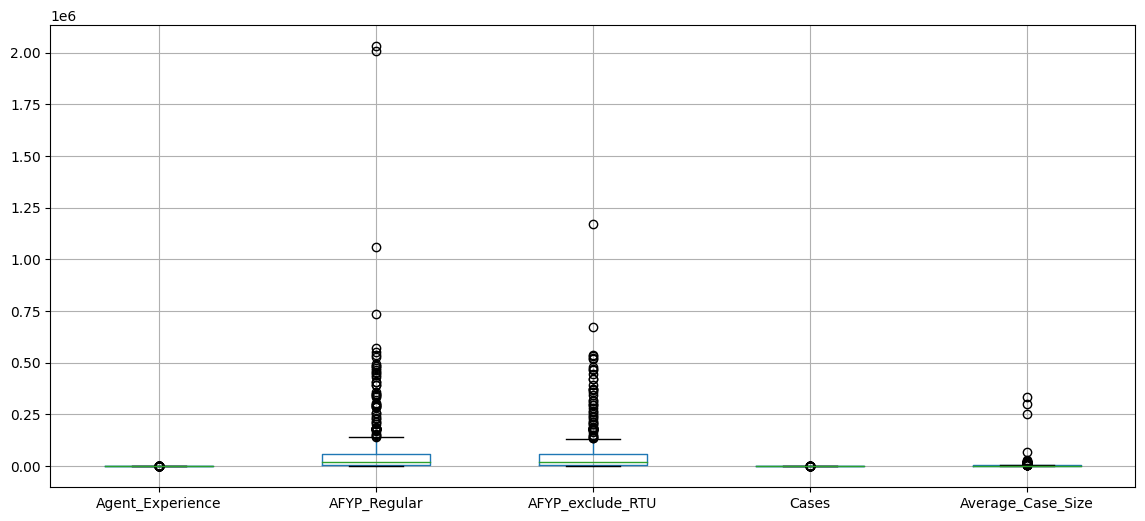

In [13]:
plt.figure(figsize=(14,6))
data1.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe01db99c40>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0209271c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe01db99ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe020927700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0209279a0>],
 'means': []}

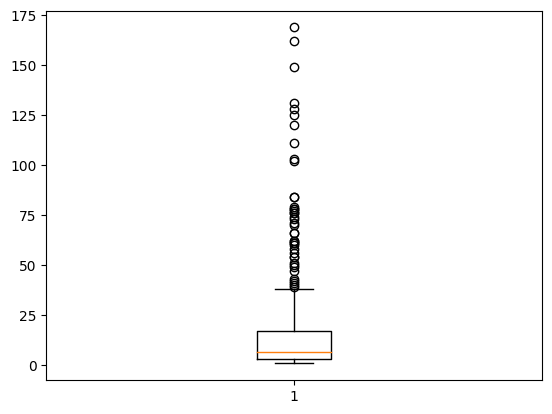

In [14]:
plt.boxplot(data1['Cases'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe020908e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0209183d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe020908bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe020918910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe020918bb0>],
 'means': []}

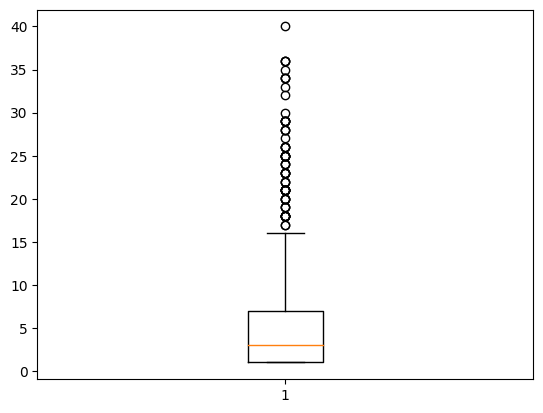

In [15]:
plt.boxplot(data1['Agent_Experience'])

**Check for Data Types**

In [16]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGENT_CODE         414 non-null    object 
 1   GAM_CODE           414 non-null    object 
 2   Agent_Experience   414 non-null    int64  
 3   REGION_NAME        414 non-null    object 
 4   AFYP_Regular       414 non-null    float64
 5   AFYP_exclude_RTU   414 non-null    float64
 6   Cases              414 non-null    int64  
 7   Average_Case_Size  414 non-null    float64
 8   Agent_Category     414 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 29.2+ KB


In [17]:
# Convert the Agent_Category column to categorical using Label Encoding technique
# High=0, Low=1

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data1['Agent_Category'] = labelencoder.fit_transform(data1['Agent_Category'])
data1.head(20)

,AGENT_CODE,GAM_CODE,Agent_Experience,REGION_NAME,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size,Agent_Category
0,1EI00045,1EI00045,29,KL REGION,1920.00,1920.00,1,1920.000000,1
1,1EI00051,1EI00051,25,NORTHERN REGION,183464.60,183344.60,60,3057.743333,0
2,1EI00071,1EI00071,32,KL REGION,56899.68,55939.68,19,2994.720000,1
3,1EI00073,1EI04998,34,KL REGION,1133.04,1133.04,2,566.520000,1
4,1EI00079,1EI00079,36,SABAH REGION,6720.00,6480.00,4,1680.000000,1
5,1EI00083,1EI00083,34,SARAWAK REGION,12372.24,11892.24,4,3093.060000,1
6,1EI00087,1EI00087,40,SARAWAK REGION,14280.00,12600.00,4,3570.000000,1
7,1EI00088,1EI00088,33,SARAWAK REGION,13200.00,13200.00,4,3300.000000,1
8,1EI00090,1EI00083,36,SARAWAK REGION,9000.00,9000.00,2,4500.000000,1
9,1EI00092,1EI00092,36,NORTHERN REGION,106813.20,99853.20,34,3141.564706,0


In [18]:
# convert Agent_Category int into categorical data
data1['Agent_Category']=pd.Categorical(data1['Agent_Category'])
data1.dtypes

AGENT_CODE             object
GAM_CODE               object
Agent_Experience        int64
REGION_NAME            object
AFYP_Regular          float64
AFYP_exclude_RTU      float64
Cases                   int64
Average_Case_Size     float64
Agent_Category       category
dtype: object

In [19]:
#drop column
data2=data1.drop(['AGENT_CODE','GAM_CODE','REGION_NAME'],axis=1)
data2.head()

,Agent_Experience,AFYP_Regular,AFYP_exclude_RTU,Cases,Average_Case_Size,Agent_Category
0,29,1920.00,1920.00,1,1920.000000,1
1,25,183464.60,183344.60,60,3057.743333,0
2,32,56899.68,55939.68,19,2994.720000,1
3,34,1133.04,1133.04,2,566.520000,1
4,36,6720.00,6480.00,4,1680.000000,1


**Check for Imbalance data**

In [20]:
data2['Agent_Category'].value_counts()
# this is an imbalanced data

1    340
0     74
Name: Agent_Category, dtype: int64

Balance the data by using oversampling. Increase minority class samples using SMOTE (Synthetic Minority Oversampling Technique).

In [21]:
# Before apply SMOTE

X, y = data2[['AFYP_Regular','Cases','Average_Case_Size','Agent_Experience','AFYP_exclude_RTU']], data2['Agent_Category']

counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=340 (82.126%)
Class=0, n=74 (17.874%)


In [22]:
X.shape

(414, 5)

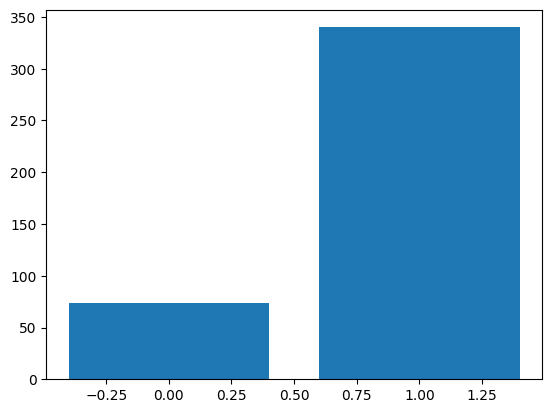

In [23]:
plt.bar(counter.keys(), counter.values())
plt.show()

In [24]:
X

,AFYP_Regular,Cases,Average_Case_Size,Agent_Experience,AFYP_exclude_RTU
0,1920.00,1,1920.000000,29,1920.00
1,183464.60,60,3057.743333,25,183344.60
2,56899.68,19,2994.720000,32,55939.68
3,1133.04,2,566.520000,34,1133.04
4,6720.00,4,1680.000000,36,6480.00
...,...,...,...,...,...
409,39381.00,5,7876.200000,1,39381.00
410,6120.00,2,3060.000000,1,6000.00
411,56244.84,6,9374.140000,1,50364.84
412,4957.56,1,4957.560000,1,4957.56


In [25]:
from imblearn.over_sampling import SMOTE

#transform dataset
oversample = SMOTE()
X, Y = oversample.fit_resample(X,y)

#summarize the new class distribution
counter = Counter(Y)
print(counter)


Counter({1: 340, 0: 340})


In [26]:
X.shape

(680, 5)

In [27]:
y.shape

(414,)

In [55]:
Y.shape

(680,)

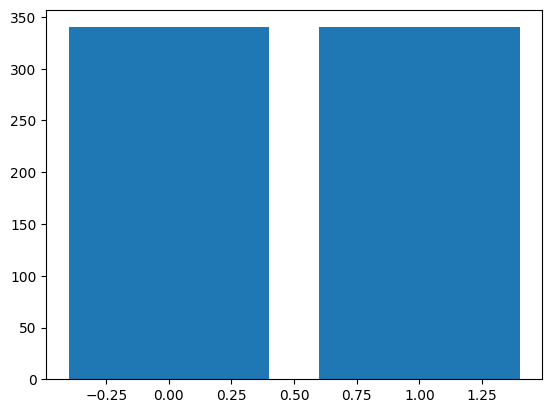

In [28]:
plt.bar(counter.keys(), counter.values())
plt.show()

# **Scaling of Data**

In [29]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalised = sc.fit_transform(X)
print('Normalized data:')
data2_normalised = pd.DataFrame(normalised,columns=X.columns)
data2_normalised.head()

Normalized data:


,AFYP_Regular,Cases,Average_Case_Size,Agent_Experience,AFYP_exclude_RTU
0,-0.644786,-0.888897,-0.257186,2.702276,-0.823052
1,0.048226,0.930064,-0.214757,2.207980,0.319784
2,-0.434912,-0.333960,-0.217107,3.072999,-0.482769
3,-0.647790,-0.858067,-0.307661,3.320147,-0.828009
4,-0.626463,-0.796407,-0.266137,3.567295,-0.794328


# **Data Splitting**

In [30]:
X.shape

(680, 5)

In [31]:
y.shape

(414,)

In [32]:
# train test split of model

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

# **Create FNN Model**

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
X_train.shape

(544, 5)

In [35]:
np.unique(Y,return_counts=True) # to check balance data

(array([0, 1]), array([340, 340]))

In [36]:
# create model, output type: binary outcome, Loss function: binary cross entrophy

model = Sequential()
model.add(Dense(256, input_dim=5, activation='relu'))  # input layer
model.add(Dense(256, activation='relu')) # hidden layer
model.add(Dense(128, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

In [37]:
#To visualize neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 100,353
Trainable params: 100,353
Non-trainable params: 0
_________________________________________________________________


In [38]:
# create a loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
X.shape

(680, 5)

In [40]:
Y.shape

(680,)

In [41]:
680/20

34.0

In [42]:
history = model.fit(X_train, y_train, epochs=25, batch_size=90)

Epoch 1/25
7/7 [==============================] - 1s 12ms/step - loss: 3342.1184 - accuracy: 0.5184
Epoch 2/25
7/7 [==============================] - 0s 10ms/step - loss: 2889.1230 - accuracy: 0.4945
Epoch 3/25
7/7 [==============================] - 0s 10ms/step - loss: 1068.5067 - accuracy: 0.5809
Epoch 4/25
7/7 [==============================] - 0s 8ms/step - loss: 743.3926 - accuracy: 0.6268
Epoch 5/25
7/7 [==============================] - 0s 8ms/step - loss: 672.9145 - accuracy: 0.6029
Epoch 6/25
7/7 [==============================] - 0s 9ms/step - loss: 141.4711 - accuracy: 0.7739
Epoch 7/25
7/7 [==============================] - 0s 8ms/step - loss: 245.5674 - accuracy: 0.7390
Epoch 8/25
7/7 [==============================] - 0s 9ms/step - loss: 118.2541 - accuracy: 0.8162
Epoch 9/25
7/7 [==============================] - 0s 10ms/step - loss: 88.9189 - accuracy: 0.8603
Epoch 10/25
7/7 [==============================] - 0s 11ms/step - loss: 45.3883 - accuracy: 0.8934
Epoch 11/25
7

In [43]:
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

5/5 [==============================] - 0s 3ms/step


In [44]:
test  = y_test.to_list()
print(test)

[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [45]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 52.94117647058824


In [46]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=25, batch_size=90)

Epoch 1/25
7/7 [==============================] - 0s 54ms/step - loss: 49.1780 - accuracy: 0.8934 - val_loss: 64.4393 - val_accuracy: 0.8750
Epoch 2/25
7/7 [==============================] - 0s 16ms/step - loss: 43.0582 - accuracy: 0.9118 - val_loss: 48.0113 - val_accuracy: 0.9044
Epoch 3/25
7/7 [==============================] - 0s 16ms/step - loss: 37.9155 - accuracy: 0.9154 - val_loss: 49.9881 - val_accuracy: 0.8897
Epoch 4/25
7/7 [==============================] - 0s 13ms/step - loss: 40.6418 - accuracy: 0.9081 - val_loss: 40.4545 - val_accuracy: 0.8897
Epoch 5/25
7/7 [==============================] - 0s 18ms/step - loss: 31.2108 - accuracy: 0.9173 - val_loss: 49.8206 - val_accuracy: 0.8897
Epoch 6/25
7/7 [==============================] - 0s 15ms/step - loss: 41.9095 - accuracy: 0.8952 - val_loss: 47.5013 - val_accuracy: 0.8897
Epoch 7/25
7/7 [==============================] - 0s 16ms/step - loss: 44.3585 - accuracy: 0.8915 - val_loss: 128.1157 - val_accuracy: 0.8015
Epoch 8/25
7

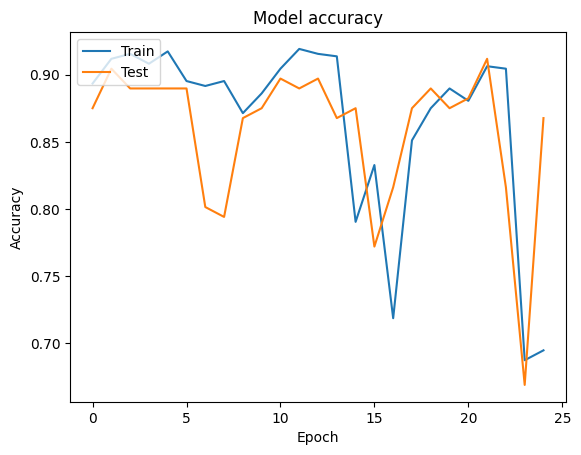

In [47]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

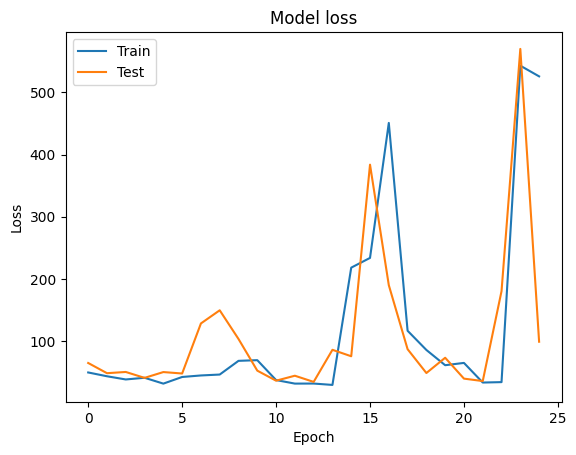

In [48]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**This is an Unrepresentative Dataset. Most probably because of the number of samples in a dataset is too small (680,5)**

